In [1]:
import json
data = 0
with open('C:\\Users\\mechadmin\\Desktop\superformula_dataset\\cp_w_epoch_20000.json') as f:
    data = json.load(f)


In [21]:
data.keys()

dict_keys(['cp', 'w'])

In [4]:
len(data['cp'])

1200

In [5]:
d = data['save_20000']
cp = d['control_points']
we = d['weights']
import ast
import numpy as np
def parse_str(s):
    # Step 1: Split the string by '|'
    parts = s.split('|')

    # Step 2: Use ast.literal_eval to convert each part to a list
    arrays = [np.array(ast.literal_eval(part)) for part in parts]

    return arrays

cpts = parse_str(cp)
weights = parse_str(we)

AttributeError: 'list' object has no attribute 'split'

In [2]:
cpts = data['cp']
weights = data['w']

In [4]:
cpts[0]

[[0.3294066786766052, -0.0012564400676637888],
 [0.20595009624958038, -0.004311207216233015],
 [0.147416889667511, -0.004049774259328842],
 [0.11281713843345642, -0.005730775184929371],
 [0.09116032719612122, -0.005539773963391781],
 [0.07957815378904343, -0.0054481904953718185],
 [0.0728420689702034, -0.005709669552743435],
 [0.0733080580830574, -0.004792491905391216],
 [0.0763372927904129, -0.004435340873897076],
 [0.08821343630552292, -0.0031466749496757984],
 [0.10538659244775772, -0.0012929907534271479],
 [0.13704971969127655, 0.001546157174743712],
 [0.19234922528266907, 0.007730971556156874],
 [0.3337211012840271, 0.02818365767598152],
 [0.3343016505241394, 0.016950663179159164],
 [0.28862446546554565, 0.018923016265034676],
 [0.2928854823112488, 0.023351190611720085],
 [0.334565669298172, 0.04669233784079552],
 [0.32644471526145935, 0.040612321346998215],
 [0.32581716775894165, 0.058663856238126755],
 [0.31024202704429626, 0.0760936439037323],
 [0.31167373061180115, 0.080231882

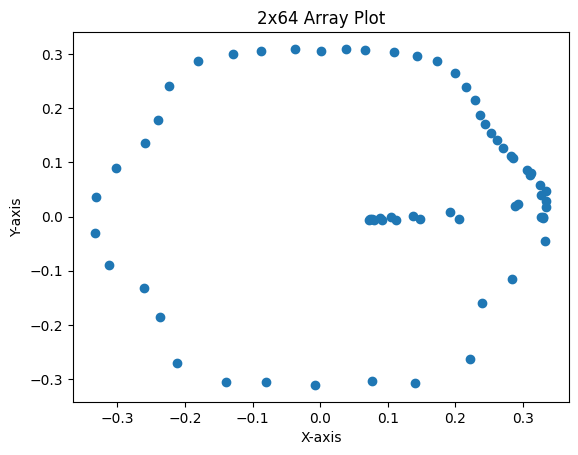

In [3]:
import numpy as np
import matplotlib.pyplot as plt
cpt = np.array(cpts[0])
weight = np.array(weights[10])

# Plot the data
plt.scatter(cpt[:,0], cpt[:,1])

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2x64 Array Plot')

# Show the plot
plt.show()

In [72]:
last_10_keys = list(data.keys())[-100:]
print(last_10_keys)

['save_10100', 'save_10200', 'save_10300', 'save_10400', 'save_10500', 'save_10600', 'save_10700', 'save_10800', 'save_10900', 'save_11000', 'save_11100', 'save_11200', 'save_11300', 'save_11400', 'save_11500', 'save_11600', 'save_11700', 'save_11800', 'save_11900', 'save_12000', 'save_12100', 'save_12200', 'save_12300', 'save_12400', 'save_12500', 'save_12600', 'save_12700', 'save_12800', 'save_12900', 'save_13000', 'save_13100', 'save_13200', 'save_13300', 'save_13400', 'save_13500', 'save_13600', 'save_13700', 'save_13800', 'save_13900', 'save_14000', 'save_14100', 'save_14200', 'save_14300', 'save_14400', 'save_14500', 'save_14600', 'save_14700', 'save_14800', 'save_14900', 'save_15000', 'save_15100', 'save_15200', 'save_15300', 'save_15400', 'save_15500', 'save_15600', 'save_15700', 'save_15800', 'save_15900', 'save_16000', 'save_16100', 'save_16200', 'save_16300', 'save_16400', 'save_16500', 'save_16600', 'save_16700', 'save_16800', 'save_16900', 'save_17000', 'save_17100', 'save

In [ ]:
for i in range(len(cpts)):
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    # cpts = parse_str(cp)
    # weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)       

In [ ]:
for i in last_10_keys:
    d = data[i]
    cp = d['control_points']
    we = d['weights']
    cpts = parse_str(cp)
    weights = parse_str(we)
    for j in range(20):
        cpt = np.array(cpts[j])
        weight = np.array(weights[j])
        cor = False
        for k in range(len(cpt[0])):
            if 0 <= cpt[0][k] < 0.1 and 0 <= cpt[1][k] < 0.1:
                cor = True
        if not cor:
            print(i)
            print(j)                                     
    

In [12]:
import itertools

def gen_grid(d, points_per_axis, lb=0., rb=1.):
    ''' Generate a grid in a d-dimensional space 
        within the range [lb, rb] for each axis '''
    
    lincoords = []
    for i in range(0, d):
        lincoords.append(np.linspace(lb, rb, points_per_axis))
    coords = list(itertools.product(*lincoords))
    
    return np.array(coords)
X = cpt
Z = None
scale = 0.8
points_per_axis = None
if Z is None or Z.shape[1] != 2 or points_per_axis is None:
    N = X.shape[0]
    points_per_axis = int(N**.5)
    bounds = (0., 3.)
    Z = gen_grid(2, points_per_axis, bounds[0], bounds[1]) # Generate a grid
    
scale /= points_per_axis*1.3
z = 0
for (i, z) in enumerate(Z):
        z =z

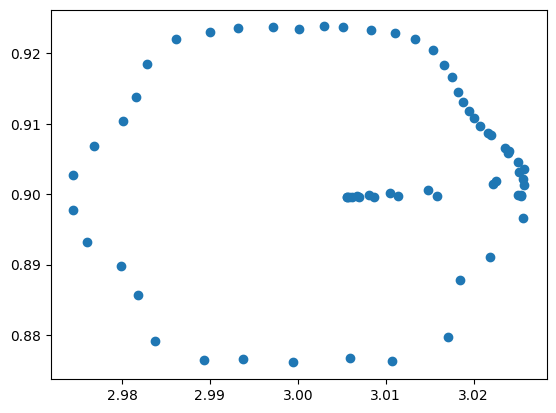

In [13]:
xys = cpt
xscl = scale
yscl = scale
z1 = z[0]
z2 = .3*z[1]
max_distance = 0.3
scaled_coords = [(x * xscl + z1, y * yscl + z2) for (x, y) in xys]
segments = []
segment = [scaled_coords[0]]
for i in range(1, len(scaled_coords)):
    dist = np.sqrt((scaled_coords[i][0] - segment[-1][0]) ** 2 +
                    (scaled_coords[i][1] - segment[-1][1]) ** 2)
    if dist <= max_distance:
        segment.append(scaled_coords[i])
    else:
        segments.append(segment)
        segment = [scaled_coords[i]]
segments.append(segment)
scaled_coords = np.array(scaled_coords)
plt.scatter(scaled_coords[:,0] ,scaled_coords[:,1])


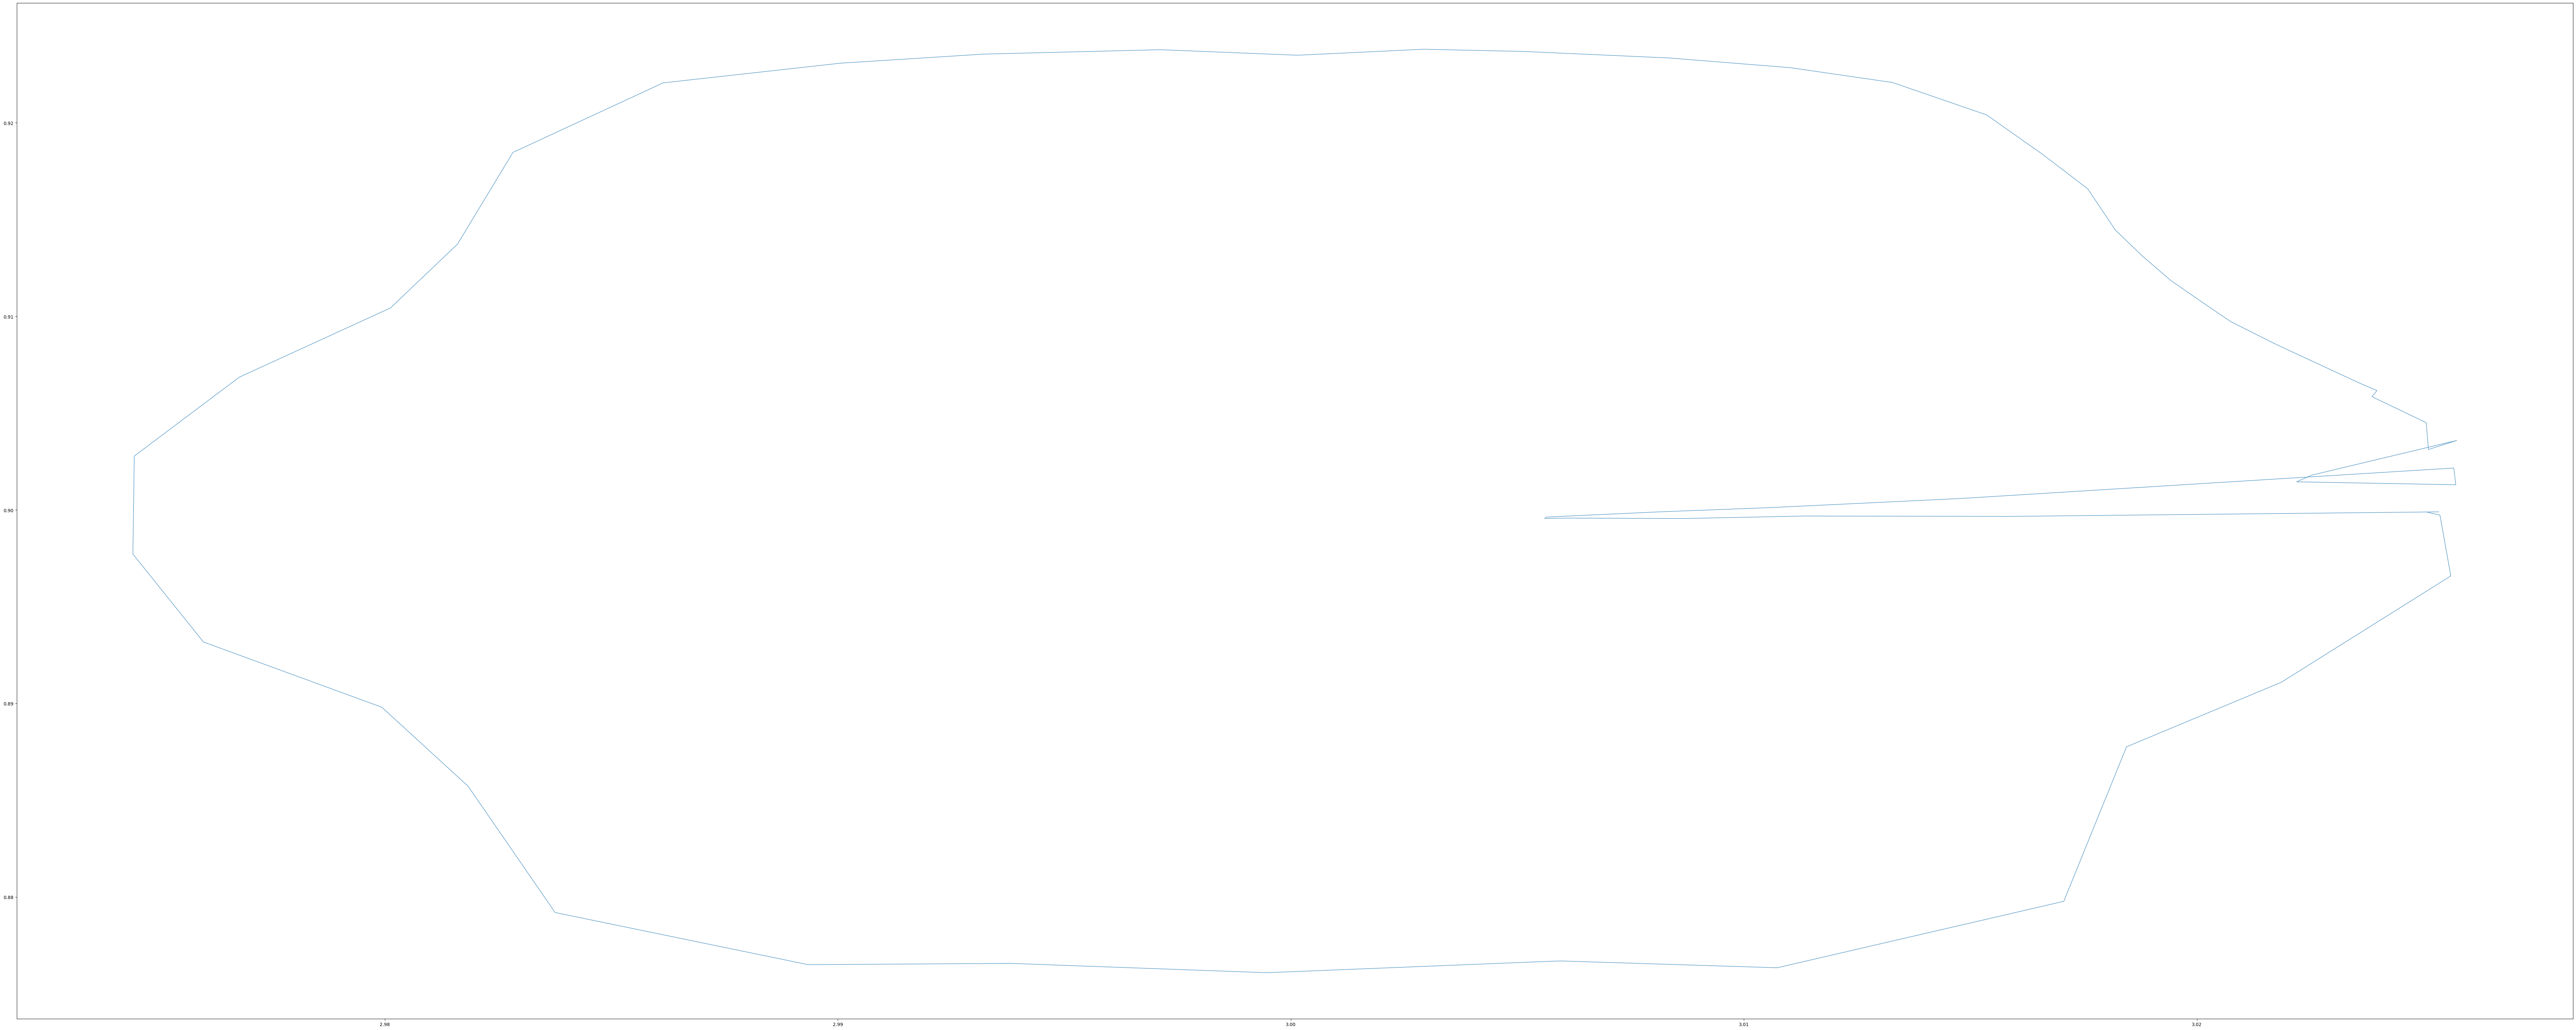

In [9]:
fig = plt.figure(figsize=(100, 40))
ax = fig.add_subplot(111)
for segment in segments:
    ax.plot(*zip(*segment),lw=1.2, alpha=.7)
segments = np.array(segments[0])

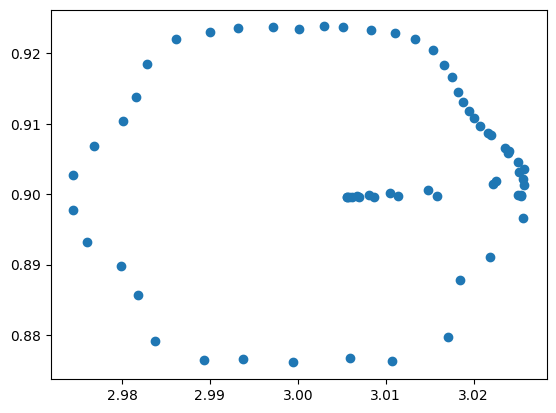